Examining the data through building Linear Models

Loading in data and seperating it

In [24]:
#loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading the cleaned data from the data cleaning file, Project2EDA.ipynb
test = pd.read_csv('./cleaned_data/c_test.csv')
train = pd.read_csv('./cleaned_data/c_train.csv')

#loading data to get unporcessed numerics
df_train = pd.read_csv('./data/training_data.csv')
df_test = pd.read_csv('./data/testing_data.csv')

# Dropping row number and 'id' columns
x_test_r = df_test.drop(columns=['Unnamed: 0','id'])
x_train_r = df_train.drop(columns=['Unnamed: 0','id'])

# Renaming residence_type to make capitalization uniform
x_test_r = x_test_r.rename(columns={'Residence_type':'residence_type'})
x_train_r = x_train_r.rename(columns={'Residence_type':'residence_type'})

# Dropping NaNs, all of which occur in bmi
x_train_r['bmi'] = x_train_r['bmi'].fillna(x_train_r['bmi'].mean())
x_test_r['bmi'] = x_test_r['bmi'].fillna(x_test_r['bmi'].mean())

Xtrain_num_r = x_train_r.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
Xtest_num_r = x_test_r.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

print(test.shape)
print(train.shape)

# Dropping row number
test = test.drop(columns=['Unnamed: 0'])
train = train.drop(columns=['Unnamed: 0'])

print(test.shape)
print(train.shape)

print(test.shape)
print(train.shape)

#seperate into X and y
ytest = test['stroke']
ytrain = train['stroke']
Xtest = test.drop(columns='stroke')
Xtrain = train.drop(columns='stroke')

(1023, 39)
(4087, 39)
(1023, 38)
(4087, 38)
(1023, 38)
(4087, 38)


In [25]:
#establish some column groups
poly = ['age^2', 'age hypertension', 'age heart_disease', 'age avg_glucose_level', 'age bmi', 'hypertension^2','hypertension heart_disease', 'hypertension avg_glucose_level','hypertension bmi', 'heart_disease^2','heart_disease avg_glucose_level', 'heart_disease bmi','avg_glucose_level^2', 'avg_glucose_level bmi', 'bmi^2']
numerics = ['age','hypertension','heart_disease','avg_glucose_level', 'bmi']
cats = ['gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'residence_type_Rural', 'residence_type_Urban','smoking_status_Unknown', 'smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']

In [26]:
print(Xtest_num_r.shape)
print(Xtrain_num_r.shape)

print(len(ytest))
print(len(ytrain))

(1023, 5)
(4087, 5)
1023
4087


Dateframe key

Scaled and Expanded:
- Xtest
- Xtrain

Unscaled Numerics
- Xtest_num_r
- Xtrain_num_r

Stroke Var
- ytest
- ytrain

Begin looking at Linear model for high correlation variables and combinations of them (excerpt from EDA document)
1. age - correlates most strongly with stroke
2. hypertension - decent correlation with stroke, though also correlates with age and could be redundant because of this
3. heart disease - decent correlation with stroke, but only a small proportion of the dataset have heart disease
4. glucose / log glucose - correlates somewhat with stroke, it is continuous numeric, so could have more say in classification, and the performance of the model with or without log scaled glucose could be interesting
5. ever married - the two answers to this question have opposite correlations, which could make it a powerful predictor.
6. work type - particulary in self-employed, or stay at home cases, there is correlation
7. smoking status - those who have smoked or do smoke have positive correlation with stroke

Note that for smoking status, it was made a binary value, where it was true if the subject was a current or former smoker

Below are the reusable functions made for linear regression

R2:  0.06755094279891583
RMSE:  0.20819885927632586

R2:  0.024465387766799962
RMSE:  0.21295465118959514

R2:  0.06686427646456372
RMSE:  0.2082755051993214

R2:  0.07451874494651445
RMSE:  0.20741950907055437

R2:  0.06038951880139787
RMSE:  0.2089968376913247



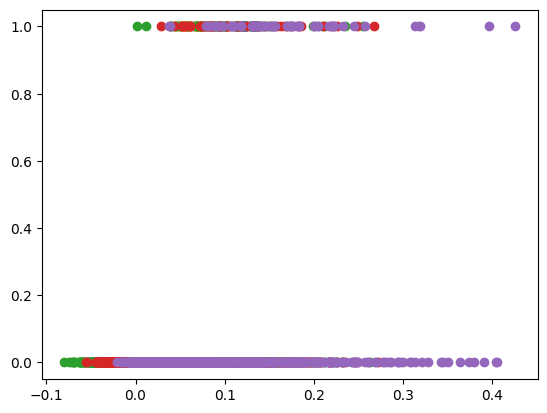

In [27]:
#create function to make models
from sklearn.linear_model import LinearRegression # Import linear regression model

def linear_reg_model(X_train, y_train, X_test, y_test):
    N_test = len(y_test)
    reg = LinearRegression().fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    y_hat = reg.predict(X_test)
    residuals = y_test - y_hat
    #SSE = np.sum(np.square(y_hat - y_test))
    SSE = np.sum(np.square(y_test - y_hat))
    RMSE = (SSE/N_test)**(1/2)
    return r2, y_hat, residuals, SSE, RMSE
    
def showResults(r2, RMSE, y_hat, y_test):
    print("R2: ", r2)
    print("RMSE: ", RMSE)
    print(plt.scatter(y_hat, y_test), "\n")

#base line without a strategy
train_age = Xtrain['age']
test_age = Xtest['age']
r2, yhat, residuals, SSE, RMSE = linear_reg_model(train_age.values.reshape(-1,1), ytrain, test_age.values.reshape(-1,1), ytest)
showResults(r2, RMSE, yhat, ytest)

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[cats], ytrain, Xtest[cats], ytest)
showResults(r2, RMSE, yhat, ytest)

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[numerics], ytrain, Xtest[numerics], ytest)
showResults(r2, RMSE, yhat, ytest)

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_num_r, ytrain, Xtest_num_r, ytest)
showResults(r2, RMSE, yhat, ytest)

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain, ytrain, Xtest, ytest)
showResults(r2, RMSE, yhat, ytest)

Strategy Number One

Use linear regression to look at different combinations of variables of interest.

In [28]:
#making smoked var
Xtest['smoked'] = Xtest['smoking_status_formerly smoked'] + Xtest['smoking_status_smokes']
Xtrain['smoked'] = Xtrain['smoking_status_formerly smoked'] + Xtrain['smoking_status_smokes']

poly_strat1 = ['age^2', 'age hypertension', 'age heart_disease', 'age avg_glucose_level', 'hypertension^2','hypertension heart_disease', 'hypertension avg_glucose_level', 'heart_disease^2','heart_disease avg_glucose_level', 'avg_glucose_level^2']
numerics_strat1 = ['age','hypertension','heart_disease','avg_glucose_level']
cats_strat1 = ['ever_married_Yes', 'work_type_Self-employed', 'work_type_children', 'smoked']
num_poly_strat1 =  ['age','hypertension','heart_disease','avg_glucose_level', 'age^2', 'age hypertension', 'age heart_disease', 'age avg_glucose_level', 'hypertension^2','hypertension heart_disease', 'hypertension avg_glucose_level', 'heart_disease^2','heart_disease avg_glucose_level', 'avg_glucose_level^2']
interactions_strat1 = ['age hypertension', 'age heart_disease', 'age avg_glucose_level', 'hypertension heart_disease', 'hypertension avg_glucose_level', 'heart_disease avg_glucose_level']
num_cat = ['age','hypertension','heart_disease','avg_glucose_level', 'ever_married_Yes', 'work_type_Self-employed', 'work_type_children', 'smoked']

Scaled Numerics
R2:  0.07243881347223613
RMSE:  0.2076524561140286

Unscaled Numerics
R2:  0.07254683364611081
RMSE:  0.20764036456264337

Scaled Numerics and Polynomials
R2:  0.08710860447867941
RMSE:  0.20600385400832194

Unscaled Numerics and Polynomials
R2:  0.08704793497696872
RMSE:  0.20601069926044552

Categoricals
R2:  0.021831399382570837
RMSE:  0.21324195107283636



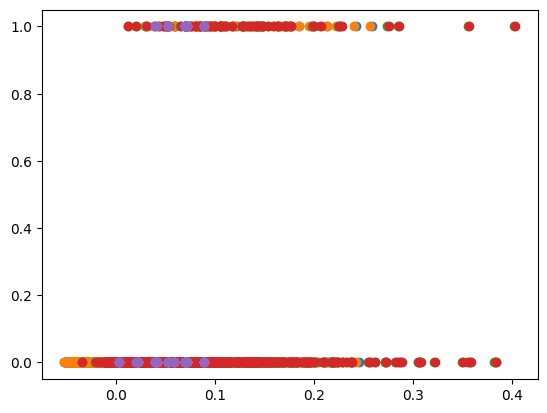

In [38]:
#testing with both scaled and non-scaled vars

#look at just the selected numerics
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[numerics_strat1], ytrain, Xtest[numerics_strat1], ytest)
print("Scaled Numerics")
showResults(r2, RMSE, yhat, ytest)

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_num_r[numerics_strat1], ytrain, Xtest_num_r[numerics_strat1], ytest)
print("Unscaled Numerics")
showResults(r2, RMSE, yhat, ytest)

#look at both numerics and poly
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[num_poly_strat1], ytrain, Xtest[num_poly_strat1], ytest)
print("Scaled Numerics and Polynomials")
showResults(r2, RMSE, yhat, ytest)
one = "Linear Regression with Scaled Numerics and Polynomials"
r2_1 = r2
RMSE_1 = RMSE

Xtest_r_num_poly = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[poly_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_num_poly = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[poly_strat1].reset_index(drop=True)],axis=1)
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_r_num_poly, ytrain, Xtest_r_num_poly, ytest)
print("Unscaled Numerics and Polynomials")
showResults(r2, RMSE, yhat, ytest)
two = "Linear Regression with Unscaled Numerics and Polynomials"
r2_2 = r2
RMSE_2 = RMSE


#look at cats
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[cats_strat1], ytrain, Xtest[cats_strat1], ytest)
print("Categoricals")
showResults(r2, RMSE, yhat, ytest)

Polynomials
R2:  0.0824058334276061
RMSE:  0.20653378806575326

Polynomials - Just interaction variables
R2:  0.06618430899533989
RMSE:  0.20835137560841235

Scaled Numerics and Categoricals
R2:  0.07973185177702835
RMSE:  0.2068345015080263

Unscaled Numerics and Categoricals
R2:  0.07981283664654826
RMSE:  0.20682540044673162



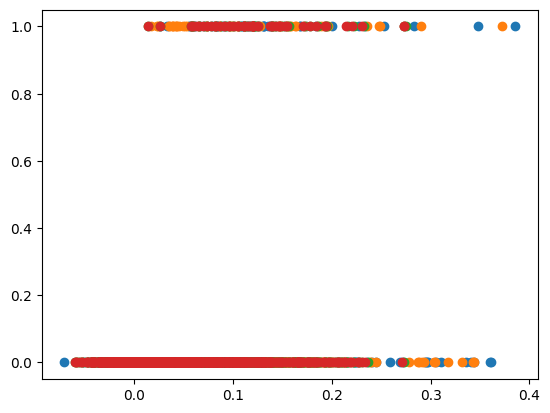

In [39]:
#Look at poly
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[poly_strat1], ytrain, Xtest[poly_strat1], ytest)
print("Polynomials")
showResults(r2, RMSE, yhat, ytest)
three = "Linear Regression with Polynomials"
r2_3 = r2
RMSE_3 = RMSE

#just interaction vars
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[interactions_strat1], ytrain, Xtest[interactions_strat1], ytest)
print("Polynomials - Just interaction variables")
showResults(r2, RMSE, yhat, ytest)

#cats and numerics
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain[num_cat], ytrain, Xtest[num_cat], ytest)
print("Scaled Numerics and Categoricals")
showResults(r2, RMSE, yhat, ytest)

Xtest_r_num_cat = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[cats_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_num_cat = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[cats_strat1].reset_index(drop=True)],axis=1)
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_r_num_cat, ytrain, Xtest_r_num_cat, ytest)
print("Unscaled Numerics and Categoricals")
showResults(r2, RMSE, yhat, ytest)

All Variables (Scaled Nums)
R2:  0.06038951880162391
RMSE:  0.20899683769129956

All Variables (Unscaled Nums)
R2:  0.08602263314128633
RMSE:  0.2061263482004684



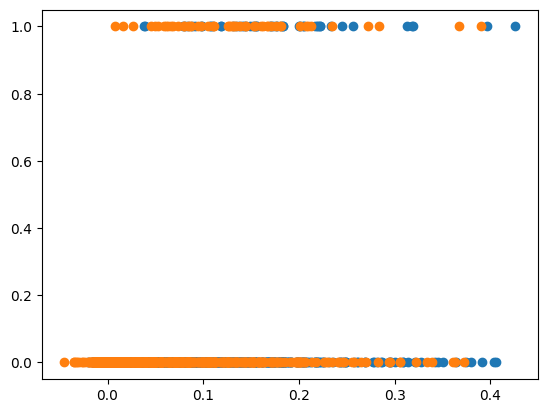

In [40]:
#all vars
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain, ytrain, Xtest, ytest)
print("All Variables (Scaled Nums)")
showResults(r2, RMSE, yhat, ytest)

Xtest_r_all = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[poly_strat1].reset_index(drop=True), Xtest[cats_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_all = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[poly_strat1].reset_index(drop=True), Xtrain[cats_strat1].reset_index(drop=True)],axis=1)
r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_r_all, ytrain, Xtest_r_all, ytest)
print("All Variables (Unscaled Nums)")
showResults(r2, RMSE, yhat, ytest)
four = "Linear Regression with All Variables (Unscaled Nums)"
r2_4 = r2
RMSE_4 = RMSE

When the scaled numerics were used, it got better: Uping the degree to see how that effects the results

In [41]:
#loading the cleaned data from the data cleaning file, Project2EDA.ipynb
test_3 = pd.read_csv('./cleaned_data/c_test_deg3.csv')
train_3 = pd.read_csv('./cleaned_data/c_train_deg3.csv')

# Dropping row number
test_3 = test_3.drop(columns=['Unnamed: 0'])
train_3 = train_3.drop(columns=['Unnamed: 0'])

#seperate into X and y
ytest_3 = test_3['stroke']
ytrain_3 = train_3['stroke']
Xtest_3 = test_3.drop(columns='stroke')
Xtrain_3 = train_3.drop(columns='stroke')

Xtest_3.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'log_glucose', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'residence_type_Rural',
       'residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'age^2', 'age hypertension',
       'age heart_disease', 'age avg_glucose_level', 'age bmi',
       'hypertension^2', 'hypertension heart_disease',
       'hypertension avg_glucose_level', 'hypertension bmi', 'heart_disease^2',
       'heart_disease avg_glucose_level', 'heart_disease bmi',
       'avg_glucose_level^2', 'avg_glucose_level bmi', 'bmi^2'],
      dtype='object')

Scaled Numerics and Polynomials - with Degree 3
R2:  0.07223098325721444
RMSE:  0.207675718211496



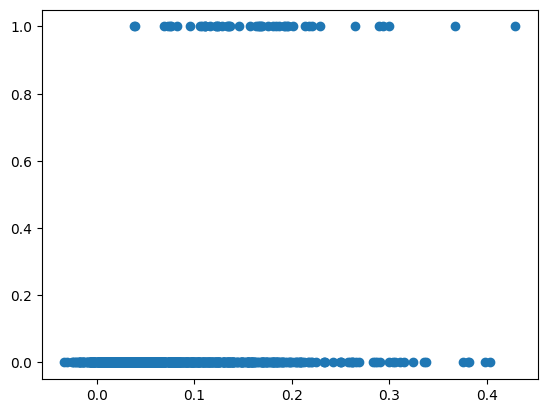

In [42]:
#nums and poly
Xtrain_3_np = Xtrain_3.loc[:,['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','age^2', 'age hypertension','age heart_disease', 'age avg_glucose_level', 'age bmi','hypertension^2', 'hypertension heart_disease','hypertension avg_glucose_level', 'hypertension bmi', 'heart_disease^2','heart_disease avg_glucose_level', 'heart_disease bmi','avg_glucose_level^2', 'avg_glucose_level bmi', 'bmi^2'] ]
Xtest_3_np = Xtest_3.loc[:,['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','age^2', 'age hypertension','age heart_disease', 'age avg_glucose_level', 'age bmi','hypertension^2', 'hypertension heart_disease','hypertension avg_glucose_level', 'hypertension bmi', 'heart_disease^2','heart_disease avg_glucose_level', 'heart_disease bmi','avg_glucose_level^2', 'avg_glucose_level bmi', 'bmi^2'] ]

r2, yhat, residuals, SSE, RMSE = linear_reg_model(Xtrain_3_np, ytrain_3, Xtest_3_np, ytest_3)
print("Scaled Numerics and Polynomials - with Degree 3")
showResults(r2, RMSE, yhat, ytest)

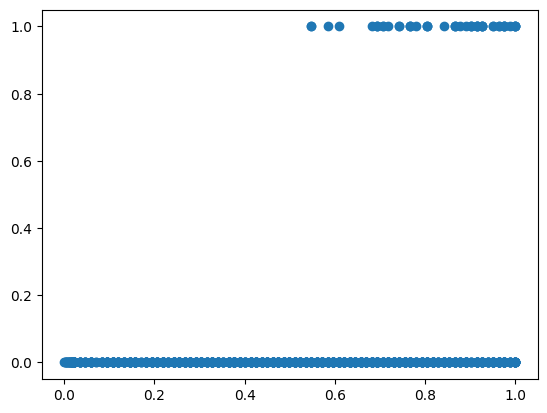

In [43]:
plt.scatter(Xtest['age'], ytest)

Logit Regression - Strategy 2

Used since the target variable is a binary 0/1
This can also be used to create a table that gives a probability each case will have a stroke given the training data

In [44]:
#set up for Logit Regression
#source: https://realpython.com/logistic-regression-python/
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from statistics import mean

def logit_reg(Xtrain, ytrain, Xtest, ytest):
    model = LogisticRegression(solver='liblinear', random_state=2).fit(Xtrain, ytrain)
    yhat = model.predict(Xtest)
    yprob = model.predict_proba(Xtest)
    
    #data = [ytest, yhat, yprob[:, 0], yprob[:, 1]]
    #df = pd.DataFrame(data, columns=['Result', 'Prediction', 'Probability of 0', 'Probability of 1']) 
    #df = pd.concat([ytest, yhat, yprob[]], axis=1)
    #data = [ytest, yhat]
    #df = pd.DataFrame(data, columns=['Result', 'Prediction'])
    yt =pd.DataFrame({'Result':ytest})
    yh = pd.DataFrame({'Prediction':yhat})
    yp =pd.DataFrame(yprob, columns=['Probability of 0', 'Probability of 1'])
    df = pd.concat([yt.reset_index(drop=True), yh.reset_index(drop=True), yp.reset_index(drop=True)], axis=1)
    
    #using probability to calculate a sort-of R2
    #calc Sum of Squared Error (SSE)
    SSE = np.sum(np.square(ytest - yp['Probability of 1']))
    N_test = len(ytest)
    
    # Total Sum of Squares (TSS)
    avg = mean(ytest)
    TSS = 0
    for i in ytest:
        TSS += ((i-avg)**2)
    
    #r2 = 1 - (SSE/TSS)
    r2 = 1 - (SSE/TSS)
    

    conM_array = confusion_matrix(ytest, model.predict(Xtest))
    residuals = ytest - yhat
    N_test = len(ytest)
    RMSE = (SSE/N_test)**(1/2)
    return r2, yhat, residuals, SSE, RMSE, conM_array, df
    
def showResults_log(r2, RMSE, y_hat, y_test, conM_array):
    print("R2: ", r2)
    print("RMSE: ", RMSE)
    print("Confustion Matrix ", conM_array)
    print(plt.scatter(y_hat, y_test), "\n")


Scaled age
R2:  0.08785626864336804
RMSE:  0.20591947746073525
Confustion Matrix  [[973   0]
 [ 50   0]]

unscaled age
R2:  0.09086800700673126
RMSE:  0.2055792414083986
Confustion Matrix  [[973   0]
 [ 50   0]]



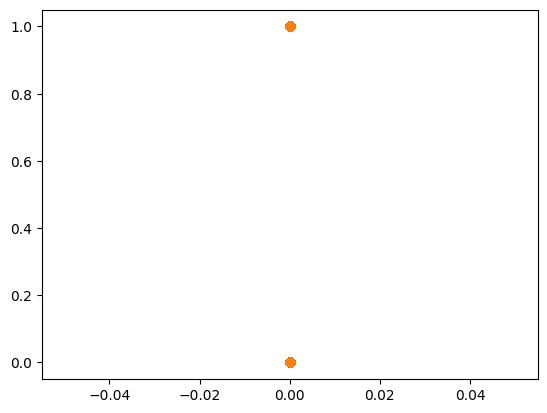

In [45]:
#with age - very likely underfit but interesting

print("Scaled age")
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain['age'].values.reshape(-1,1), ytrain, Xtest['age'].values.reshape(-1,1), ytest)
showResults_log(r2, RMSE, yhat, ytest, conM_array)
five = "Logistic Regression with Scaled Age"
r2_5 = r2
RMSE_5 = RMSE

print("unscaled age")
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_num_r['age'].values.reshape(-1,1), ytrain, Xtest_num_r['age'].values.reshape(-1,1), ytest)
showResults_log(r2, RMSE, yhat, ytest, conM_array)
six = "Logistic Regression with Scaled Age"
r2_6 = r2
RMSE_6 = RMSE

Scaled Numerics
R2:  0.0870967252481577
RMSE:  0.20600519434262732
Confustion Matrix  [[973   0]
 [ 50   0]]

Unscaled Numerics
R2:  0.09086897397894544
RMSE:  0.20557913207913253
Confustion Matrix  [[973   0]
 [ 50   0]]

Scaled Numerics and Polynomials
R2:  0.07655322900625461
RMSE:  0.20719139863948877
Confustion Matrix  [[970   3]
 [ 48   2]]

Unscaled Numerics and Polynomials
R2:  0.05768580151014058
RMSE:  0.2092973145722793
Confustion Matrix  [[966   7]
 [ 47   3]]

Categoricals
R2:  0.020721300725050518
RMSE:  0.21336291819434425
Confustion Matrix  [[973   0]
 [ 50   0]]



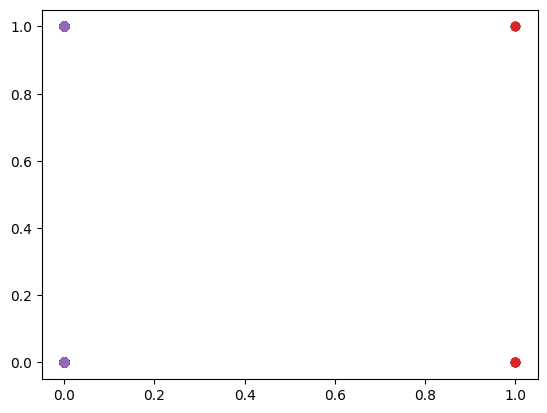

In [55]:
#look at just the selected numerics
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[numerics_strat1], ytrain, Xtest[numerics_strat1], ytest)
print("Scaled Numerics")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
seven = "Logistic Regression with Scaled Numerics"
r2_7 = r2
RMSE_7 = RMSE

r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_num_r[numerics_strat1], ytrain, Xtest_num_r[numerics_strat1], ytest)
print("Unscaled Numerics")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
eight = "Logistic Regression with Unscaled Numerics"
r2_8 = r2
RMSE_8 = RMSE
df_res = df

#look at both numerics and poly
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[num_poly_strat1], ytrain, Xtest[num_poly_strat1], ytest)
print("Scaled Numerics and Polynomials")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

Xtest_r_num_poly = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[poly_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_num_poly = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[poly_strat1].reset_index(drop=True)],axis=1)
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_r_num_poly, ytrain, Xtest_r_num_poly, ytest)
print("Unscaled Numerics and Polynomials")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

#look at cats
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[cats_strat1], ytrain, Xtest[cats_strat1], ytest)
print("Categoricals")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

Polynomials
R2:  0.07838270511732703
RMSE:  0.20698605944136494
Confustion Matrix  [[972   1]
 [ 49   1]]

Polynomials - Just interaction variables
R2:  0.06101186606694575
RMSE:  0.2089276121144549
Confustion Matrix  [[973   0]
 [ 49   1]]

Scaled Numerics and Categoricals
R2:  0.08730492804308176
RMSE:  0.20598170154542209
Confustion Matrix  [[973   0]
 [ 50   0]]

Unscaled Numerics and Categoricals
R2:  0.0899820294354865
RMSE:  0.20567938871653077
Confustion Matrix  [[973   0]
 [ 50   0]]



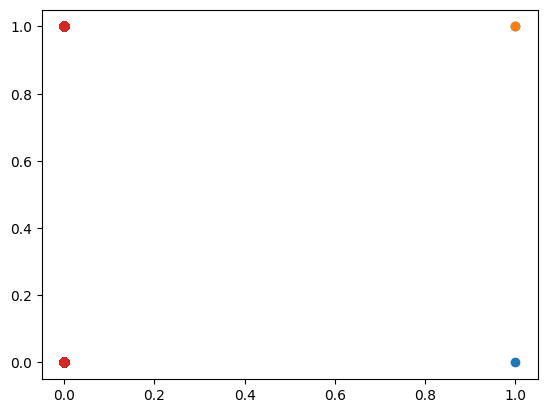

In [47]:
#Look at poly
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[poly_strat1], ytrain, Xtest[poly_strat1], ytest)
print("Polynomials")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

#just interaction vars
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[interactions_strat1], ytrain, Xtest[interactions_strat1], ytest)
print("Polynomials - Just interaction variables")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

#cats and numerics
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain[num_cat], ytrain, Xtest[num_cat], ytest)
print("Scaled Numerics and Categoricals")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
nine = "Logistic Regression with Scaled Numerics and Categoricals"
r2_9 = r2
RMSE_9 = RMSE

Xtest_r_num_cat = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[cats_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_num_cat = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[cats_strat1].reset_index(drop=True)],axis=1)
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_r_num_cat, ytrain, Xtest_r_num_cat, ytest)
print("Unscaled Numerics and Categoricals")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
ten = "Logistic Regression with Unscaled Numerics and Categoricals"
r2_10 = r2
RMSE_10 = RMSE

All Variables (Scaled Nums)
R2:  0.08172679698384255
RMSE:  0.20661019332087274
Confustion Matrix  [[973   0]
 [ 49   1]]

All Variabled (Unscaled Nums)
R2:  0.05779064993931016
RMSE:  0.20928567031118478
Confustion Matrix  [[966   7]
 [ 47   3]]



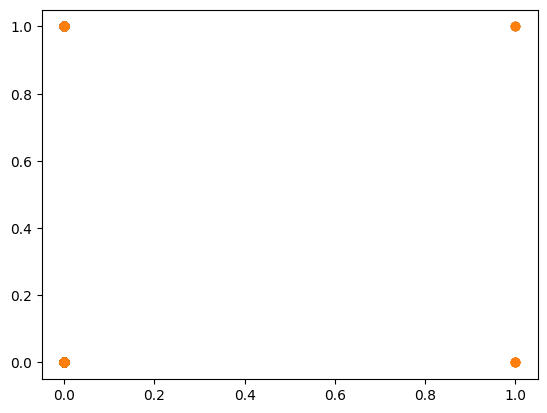

In [53]:
#all vars
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain, ytrain, Xtest, ytest)
print("All Variables (Scaled Nums)")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
eleven = "Logistic Regression with All Variables (Scaled Nums)"
r2_11 = r2
RMSE_11 = RMSE

Xtest_r_all = pd.concat([Xtest_num_r[numerics_strat1].reset_index(drop=True), Xtest[poly_strat1].reset_index(drop=True), Xtest[cats_strat1].reset_index(drop=True)],axis=1)
Xtrain_r_all = pd.concat([Xtrain_num_r[numerics_strat1].reset_index(drop=True), Xtrain[poly_strat1].reset_index(drop=True), Xtrain[cats_strat1].reset_index(drop=True)],axis=1)
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_r_all, ytrain, Xtest_r_all, ytest)
print("All Variabled (Unscaled Nums)")
showResults_log(r2, RMSE, yhat, ytest, conM_array)
tweleve = "Logistic Regression with All Variables (Scaled Nums)"
r2_12 = r2
RMSE_12 = RMSE

Scaled Numerics and Polynomials - with Degree 3
R2:  0.07432414462921999
RMSE:  0.2074413149042534
Confustion Matrix  [[973   0]
 [ 50   0]]



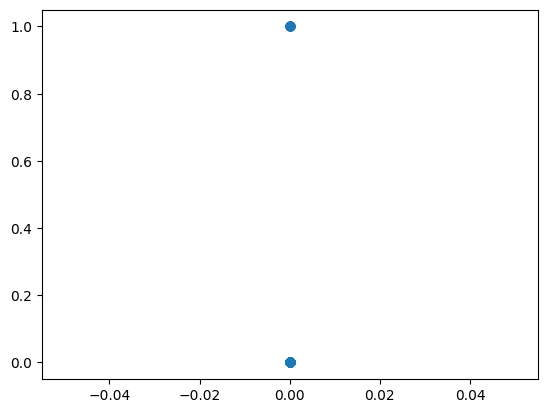

In [49]:
#expanded version
r2, yhat, res, SSE, RMSE, conM_array, df = logit_reg(Xtrain_3_np, ytrain_3, Xtest_3_np, ytest_3)
print("Scaled Numerics and Polynomials - with Degree 3")
showResults_log(r2, RMSE, yhat, ytest, conM_array)

Results table with any model that was decent

In [50]:
table = {
    'Test': [one, two, three, four, five, six, seven, eight, nine, ten, eleven, tweleve],
    'R^2': [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8, r2_9, r2_10, r2_11, r2_12],
    'RMSE': [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6, RMSE_7, RMSE_8, RMSE_9, RMSE_10, RMSE_11, RMSE_12],
    }

df = pd.DataFrame(table)

df

,Test,R^2,RMSE
0,Linear Regression with Scaled Numerics and Pol...,0.087109,0.206004
1,Linear Regression with Unscaled Numerics and P...,0.087048,0.206011
2,Linear Regression with Polynomials,0.082406,0.206534
3,Linear Regression with All Variables (Unscaled...,0.086023,0.206126
4,Logistic Regression with Scaled Age,0.087856,0.205919
5,Logistic Regression with Scaled Age,0.090868,0.205579
6,Logistic Regression with Scaled Numerics,0.087097,0.206005
7,Logistic Regression with Unscaled Numerics,0.090869,0.205579
8,Logistic Regression with Scaled Numerics and C...,0.087305,0.205982
9,Logistic Regression with Unscaled Numerics and...,0.089982,0.205679


Based on the results the model with the best fit was done with Logistic Regression and Scaled Numerics

It is interesting to see the difference between using scaled vs. unscaled varaibles. In some cases using unscaled variables would make the model fit better, but not all. It is possible using unscaled variables put more emphasis on age, the variable with the most correlation to stroke, and resulted in a (usually) better fitting model. 

The most interesting result is the probability of having a stroke for each case created in Logisitic Regression. While cases that did have a stroke often did not exceed 50% chance, they did have a higher chance. This proves that the data can be used to predict stroke, as if someone has, for example, above a 20% chance they know they are at extra risk.